In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [79]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [80]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
#                 'Acceleration', 'Model Year', 'Origin']

# raw_dataset = pd.read_csv(url, names=column_names,
#                           na_values='?', comment='\t',
#                           sep=' ', skipinitialspace=True)

In [81]:
# auto-mpg.data

In [82]:
# 필요한 패키지를 가져오기
import pandas as pd

# 파일 경로 설정 (파일이 현재 작업 디렉토리에 있는 경우)
file_path = "auto-mpg.data"

# 데이터 파일을 데이터프레임으로 읽어오기
# "auto-mpg.data" 파일은 공백으로 구분된 데이터이므로 delim_whitespace=True로 설정합니다.
# 파일에 헤더(열 이름)가 없으므로 header=None으로 설정합니다.
# 각 열에 대한 이름은 나중에 추가할 것입니다.
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# 열 이름 추가 (데이터에 포함된 열 이름을 사용하거나, 원하는 이름으로 변경할 수 있습니다.)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# 데이터프레임 확인
df

data = df

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


# train, target 나누기

In [83]:
y = data['mpg']
x = data[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']]
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,1
394,4,97.0,52.00,2130.0,24.6,82,2
395,4,135.0,84.00,2295.0,11.6,82,1
396,4,120.0,79.00,2625.0,18.6,82,1


# EDA

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [85]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [86]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


# 데이터 전처리

In [87]:
# Origin 이 범주형이여서 바꿔준다.
x['origin'] = x['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

<ipython-input-87-c0c66538b686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['origin'] = x['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [88]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,USA
1,8,350.0,165.0,3693.0,11.5,70,USA
2,8,318.0,150.0,3436.0,11.0,70,USA
3,8,304.0,150.0,3433.0,12.0,70,USA
4,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,USA
394,4,97.0,52.00,2130.0,24.6,82,Europe
395,4,135.0,84.00,2295.0,11.6,82,USA
396,4,120.0,79.00,2625.0,18.6,82,USA


In [89]:
x = pd.get_dummies(x, columns=['origin'], prefix='', prefix_sep='')
x.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,Europe,Japan,USA
393,4,140.0,86.00,2790.0,15.6,82,0,0,1
394,4,97.0,52.00,2130.0,24.6,82,1,0,0
395,4,135.0,84.00,2295.0,11.6,82,0,0,1
396,4,120.0,79.00,2625.0,18.6,82,0,0,1
397,4,119.0,82.00,2720.0,19.4,82,0,0,1


In [90]:
import re

# int 타입 : cylinders model_year origin
# object 타입 : horsepower

# 특정 컬럼을 int 타입에서 float 타입으로 변경하려면
x['cylinders'] = x['cylinders'].astype(float)
x['model_year'] = x['model_year'].astype(float)
x['USA'] = x['USA'].astype(float)
x['Europe'] = x['Europe'].astype(float)
x['Japan'] = x['Japan'].astype(float)

# 특정 컬럼을 object 타입에서 float 타입으로 변경하려면
# NaN 값을 가진 행을 삭제
# "horsepower" 컬럼에서 숫자가 아닌 문자를 빈 문자열("")로 대체하여 숫자만 남기기
x['horsepower'] = x['horsepower'].apply(lambda x: re.sub(r'[^0-9]', '', x) if isinstance(x, str) else x)

# "horsepower" 컬럼의 데이터 타입을 float로 변환
x['horsepower'] = pd.to_numeric(x['horsepower'], errors='coerce')

# # NaN 값을 가진 행을 삭제 - > y 데이터와 개수가 달라, 삭제 말고, 평균 값을 넣어주는 방식으로 진행
# x.dropna(subset=['horsepower'], inplace=True)
# NaN 값을 평균 값으로 대체
average_horsepower = x['horsepower'].mean()
x['horsepower'].fillna(average_horsepower, inplace=True)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    float64
 6   Europe        398 non-null    float64
 7   Japan         398 non-null    float64
 8   USA           398 non-null    float64
dtypes: float64(9)
memory usage: 28.1 KB


In [91]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [92]:
y.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

# 모델 구성_ 표준화, split, Sequential()

In [93]:
# 데이터 표준화
# 데이터 split
from  tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.2, random_state=42)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01)



model = keras.Sequential() # 도화지 한장 만드는, 인공신경망을 만들기 위한...
model.add(keras.layers.Dense(7, input_shape = (9,))) # input_shape은 입력층임, 한개의 입력층에서 하나의 출력층으로 간다는 뜻)

# 총 컴퓨터가 학습해야 되는 파라미터는 10개!! 9개의 컬럼과 1개의 절편. model.summary() 코드로 확인가능!!!
model.compile(loss= 'mse', optimizer = 'adam', metrics = 'mae') # adam은 학습률을 직접 자동으로 조절해준다!! # metrics = 'mae' 절대 오차를 보여준다.
# 컴퓨터한테 mse 방법으로 계산해달라고 하고, 학습률을 자동으로 맞춰주게 amda을 사용하였고, 거기서 내가 보고 싶은 데이터인 절대오차를 보여달라고 metrics = 'mae'를 사용한거

# MSE 평균제곱오차

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True) # patience=5 : 컴퓨터가 참는 횟수(과대적합이 이어지는 수 현재는 5번연속 과대적합일때, 5번연속 모델이 좋아지지 않았을때, 주기!),
# restore_best_weights = True, 과대적합이(모델이 5번연속 모델이 좋아지지 않앗을때) 5번 연속 일어났을때, 그것을 제외하고(이전의) 모델을 보여줘!라는 뜻

hist = model.fit(train_scaled, train_target, epochs = 10000, validation_data = (test_scaled, test_target), callbacks=[es], batch_size = 3000) # epochs 학습 횟수!
# validation_data = (test_scaled, test_target) # 쪽지시험, 훈련을 한번 할때마다 쪽지 시험, 훈련데이터는 떨어지는, 쪽지시험은 올라가는 과대적합을 확인 할 수 있음!!
# val_loss인 쪽지시험의 결과를 확인 해야된다!!! - > 과대적합을 확인했을 경우 -> 얼리스탑핑 적용, 이렇게 하여, 최적의 모델을 확인 할 수 있음??!



# 손실 함수 계산
loss, mse = model.evaluate(train_input, train_target, batch_size=3000, verbose=2)
print('Mean Squared Error (MSE):', loss)


# MSE는 평균 제곱 오차를 나타냅니다.


Streaming output truncated to the last 5000 lines.
Epoch 7502/10000
1/1 [==============================] - 0s 65ms/step - loss: 280.5208 - mae: 16.3898 - val_loss: 280.7501 - val_mae: 16.4940
Epoch 7503/10000
1/1 [==============================] - 0s 109ms/step - loss: 280.4895 - mae: 16.3888 - val_loss: 280.7180 - val_mae: 16.4930
Epoch 7504/10000
1/1 [==============================] - 0s 90ms/step - loss: 280.4583 - mae: 16.3879 - val_loss: 280.6858 - val_mae: 16.4921
Epoch 7505/10000
1/1 [==============================] - 0s 90ms/step - loss: 280.4270 - mae: 16.3870 - val_loss: 280.6537 - val_mae: 16.4911
Epoch 7506/10000
1/1 [==============================] - 0s 111ms/step - loss: 280.3958 - mae: 16.3860 - val_loss: 280.6216 - val_mae: 16.4901
Epoch 7507/10000
1/1 [==============================] - 0s 108ms/step - loss: 280.3645 - mae: 16.3851 - val_loss: 280.5894 - val_mae: 16.4892
Epoch 7508/10000
1/1 [==============================] - 0s 79ms/step - loss: 280.3333 - mae: 16.3841

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 70        
                                                                 
Total params: 70 (280.00 Byte)
Trainable params: 70 (280.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model.evaluate(test_input, test_target)

# 1 번째 [17,370,756.0, 4,028.35888671875]
# 2 번째 [17,784,066.0, 3556.08984375] 노드 수 증가(32), batch 수 증가 (50)
# 3 번째 [488,604,064.0, 16541.791015625] , - layer추가 , 노드 수 증가(100), batch 수 증가
# 4 번쨰 [19,545,324.0, 3,618.091796875] , 1층 , batch_size=100
# 5 번째 [83,356,568.0, 8,674.251953125] , 1층 , SGD 사용 , activation = 'linear', batch_size=100
# 6 번째 [20,712,244.0, 3,883.132,080,078,125], 1층, adam 사용, activation = 'linear', batch_size=100
# 7 번째 [15,668,128.0, 3,406.31,298,828,125],  1층, adam사용, activation='없음', batch_size=100, epochs = 1000
# 8 번째 [18,041,990.0, 3,678.059326171875], 1층 , adam사용, activation='없음', batch_size=500, epochs = 3000
# 9 번째 [17,900,314.0, 3416.20849609375] , 1층, adam사용, activation='없음', batch_size=100, epochs = 1000, epochs = 1000, 노드 14개
# 10 번째  , 1층 , adam사용, activation='없음', batch_size=100, epochs = 1000, 노드 1개
# 11 번째, [29,574,182.0, 4,019.82080078125], 노드 1개
# 12 번째, [16,696,080.0, 3,279.92333984375], 노드 64개
# 13번째 , [14,905,614.0, 3,380.693359375], 노드 7개, adam사용, avtivation='없음' , 배치:100, 에폭:1000,
# 14번째, [19,363,676.0, 3,983.610107421875], 노드 4개, adam사용, activation='없음', 배치:100, 에폭:1000
# 15번째, [17,679,988.0, 3,634.688232421875], 노드 9개, adam사용, activation='없음', 배치:100, 에폭:1000
# 16번쨰, [172,240,864.0, 12,587.046875] , 노드 7개, 2층 노드7개, adam사용, activation='없음', 배치:100, 에폭:1000
# 17번째, [162,252,000.0, 12,270.5830078125], 1층 노드 7개, adam사용, activation='없음', 배치:1000, 에폭:5000
# 18번째,   1층 노드 7개, adam사용, activation='없음', 배치:1000, 에폭:1000
# 19번째, [9,435,014.0, 2,556.25390625], origin 전처리, 1층 노드 7개, adam사용, activation='없음', 배치:1000, 에폭:1000
# 20번째, [277,888,704.0, 15,985.146484375], origin 전처리, 1층 노드 7개, adam사용, activation='없음', 배치:3000, 에폭:10000

3/3 [==============================] - 0s 5ms/step - loss: 277888704.0000 - mae: 15985.1465


[277888704.0, 15985.146484375]

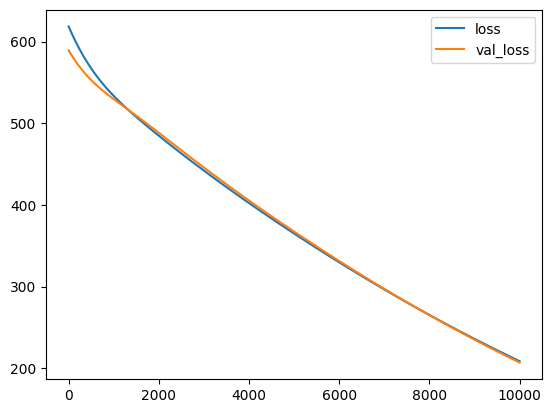

In [96]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# 다른 방법으로 접근하고, 추가 내용 공부!

In [39]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [75]:
import pandas as pd

# train_scaled와 train_target을 DataFrame으로 변환
train_scaled_df = pd.DataFrame(train_scaled, columns=train_input.columns)
train_target_df = pd.DataFrame(train_target, columns=['target'])

# train_scaled_df와 train_target_df를 수평으로 결합하여 train_dataset 생성
train_dataset = pd.concat([train_scaled_df, train_target_df], axis=1)


In [76]:
# train_dataset = train_dataset.drop('target', axis = 1)
train_dataset.rename(columns={'mpg': 'MPG'}, inplace=True)
train_dataset

,cylinders,displacement,horsepower,weight,acceleration,model_year,Europe,Japan,USA,target
0,1.527188,1.090196,-1.097464,0.552826,-1.319334,-1.696667,-0.462321,-0.511766,0.788954,NaN
1,-0.850515,-0.922996,1.108529,-0.999667,-0.413182,-1.696667,-0.462321,1.954017,-1.267500,NaN
2,-0.850515,-0.981350,0.504148,-1.124772,0.927922,1.638975,-0.462321,1.954017,-1.267500,NaN
3,-0.850515,-0.981350,0.262395,-1.392854,0.275493,0.527094,-0.462321,1.954017,-1.267500,NaN
4,-0.850515,-0.747936,1.320063,-0.327675,-0.231952,-0.306816,2.163001,-0.511766,-1.267500,NaN
...,...,...,...,...,...,...,...,...,...,...
313,-1.444941,-1.185587,1.380501,-0.761372,-0.775643,-1.140727,-0.462321,1.954017,-1.267500,NaN
314,1.527188,1.537573,-1.006807,1.822940,-1.138103,-0.862757,-0.462321,-0.511766,0.788954,NaN
315,-0.850515,-0.563150,1.320063,-0.540949,-0.304444,0.527094,-0.462321,1.954017,-1.267500,NaN
316,-0.850515,-1.000801,0.322833,-1.094985,0.601707,1.361005,-0.462321,1.954017,-1.267500,NaN


In [77]:
import seaborn as sns
sns.pairplot(train_dataset[['MPG', 'cylinders', 'displacement', 'weight']], diag_kind='kde')

KeyError: ignored

전체 통계도 확인해보겠습니다. 각 특성이 매우 다른 범위를 포괄하고 있는 것에 주목하세요.

In [63]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,318.0,1.508228e-16,1.001576,-1.444941,-0.850515,-0.850515,0.338337,1.527188
displacement,318.0,-4.468822e-17,1.001576,-1.205038,-0.908408,-0.422129,0.657409,2.558757
horsepower,318.0,-8.937644e-17,1.001576,-1.248559,-1.102752,0.413490,0.980098,1.410720
weight,318.0,2.401992e-16,1.001576,-1.615661,-0.892434,-0.174570,0.748526,2.586676
acceleration,318.0,-1.396507e-16,1.001576,-2.769176,-0.630659,-0.050722,0.601707,3.320162
model_year,318.0,-1.904835e-15,1.001576,-1.696667,-0.862757,-0.028846,0.805065,1.638975
Europe,318.0,-3.351617e-17,1.001576,-0.462321,-0.462321,-0.462321,-0.462321,2.163001
Japan,318.0,-1.117206e-17,1.001576,-0.511766,-0.511766,-0.511766,-0.511766,1.954017
USA,318.0,1.005485e-16,1.001576,-1.267500,-1.267500,0.788954,0.788954,0.788954


## 정규화

통계 표에서 각 특성의 범위가 얼마나 다른지 쉽게 알 수 있습니다.

In [64]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
cylinders,1.508228e-16,1.001576
displacement,-4.468822e-17,1.001576
horsepower,-8.937644e-17,1.001576
weight,2.401992e-16,1.001576
acceleration,-1.396507e-16,1.001576
model_year,-1.904835e-15,1.001576
Europe,-3.351617e-17,1.001576
Japan,-1.117206e-17,1.001576
USA,1.005485e-16,1.001576


특성의 스케일과 범위가 다르면 정규화(normalization)하는 것이 권장됩니다. 특성을 정규화하지 않아도 모델이 *수렴할 수 있지만*, 훈련시키기 어렵고 입력 단위에 의존적인 모델이 만들어집니다.

이것이 중요한 한 가지 이유는 특성에 모델 가중치가 곱해지기 때문입니다. 따라서 출력의 스케일과 그래디언트의 스케일은 입력 스케일의 영향을 받습니다.

모델은 특성 정규화 없이 수렴할 *수도* 있지만 정규화는 훈련을 훨씬 더 안정적으로 만듭니다.

참고: 원-핫 기능을 정규화하는 데에는 이점이 없습니다. 여기서는 단순성을 위해 수행했습니다.

### 정규화 레이어

`tf.keras.layers.Normalization`은 모델에 특성 정규화를 추가하는 깔끔하고 간단한 방법입니다.

첫 번째 단계는 레이어를 만드는 것입니다.

In [65]:
from  tensorflow import keras
import tensorflow as tf


normalizer = tf.keras.layers.Normalization(axis=-1)

In [66]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

NameError: ignored

그런 다음 `Normalization.adapt`를 호출하여 전처리 레이어의 상태를 데이터에 맞춥니다.

In [67]:
normalizer.adapt(np.array(train_features))

ValueError: ignored

평균과 분산을 계산하고 레이어에 저장합니다.

In [68]:
print(normalizer.mean.numpy())

AttributeError: ignored

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

In [69]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [70]:
linear_model.predict(train_features[:10])

ValueError: ignored

In [71]:
linear_model.layers[1].kernel

AttributeError: ignored

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)